# A Simple Model of the Labour Market

In [108]:
import numpy as np
from scipy import optimize
import sympy as sm
from math import log
import matplotlib.pyplot as plt
%matplotlib inline
import ipywidgets as widgets
import types
import modelproject_functions as my

## Introduction

In this project, we look at a simple model of the labour market described below. First, we will look at the model with a production function with a constant marginal product of labour. Then, we extend the model with a bit more realistic production function with decreasing marginal product of labour. We will both look at the implications of changing the production function for the equilibrium of the model, and how it changes the methods needed to solve the model numerically. 

## Model Description

We're considering a simple model for unemployment with the following variables:

- $Y$: Aggregate output 
- $L$: Labour
- $P$: Price
- $W$: Nominal wage
- $w \equiv W/P$: Real wage
- $C$: Consumption


We use a neoclassical static labour supply model, where individuals enjoy leisure and consumption and finance their consumption with non-labour income and/or by working. The individuals are identical, so we let one individual represent them all. 


The representative individual has a CRRA **utility function**:

$$
\begin{align}
&u(C, L) = \log (C) - \phi \frac{L^{1+\frac{1}{\epsilon}}}{1+\frac{1}{\epsilon}}
\end{align}
$$

where $\phi$ scales the disutility of labour, and $\epsilon$ is the elasticity of the labour supply with respect to the real wage rate at a given constant marginal utility of wealth, the so-called Frisch elasticity of labour supply. 


The individual's **budget constraint** is:


$$
CP \leq WL \hspace{3ex} \Leftrightarrow \hspace{3ex} C \leq wL
$$


In optimum, the equality must hold:

$$
C = wL
$$


The representative individual has the **maximisation problem**:

$$
\max_{C,L} \log (C) - \phi \frac{L^{1+\frac{1}{\epsilon}}}{1+\frac{1}{\epsilon}} \hspace{3ex} \text{subject to} \hspace{3ex} C = wL
$$

The **Lagrange function** for the individual's maximisation problem is:

$$
\mathcal{L} = \log (C) - \phi \frac{L^{1+\frac{1}{\epsilon}}}{1+\frac{1}{\epsilon}} - \lambda\left( C - wL \right)
$$


We assume perfect competition and look at a representative firm. The representative firm has the **production function**:

$$
Y = L
$$

I.e. there is constant marginal product of labour. 



For simcplicity, we normalise the price such that $P=1$. The firm's **profit function** is:

$$
\Pi = PY - WL = Y - wL
$$


Hence, the firm faces the maximisation problem:

$$
\max_{w} Y - wL \hspace{3ex} \text{subject to} \hspace{3ex} Y = L
$$


The **market clearing condition** is that the aggregate consumption equals aggregate output:

$$
C = Y \hspace{3ex} \Leftrightarrow \hspace{3ex} C = L
$$

## Analytical solution

Define symbols:

In [43]:
L = sm.symbols('L')
C = sm.symbols('C')
w = sm.symbols('w')
Y = sm.symbols('Y')
u = sm.symbols('u')
epsilon = sm.symbols('epsilon')
pi = sm.symbols('pi')
phi = sm.symbols('phi')
lambd = sm.symbols('lambda')
alpha = sm.symbols('alpha')
T = sm.symbols('T')

<br>

### Problem of the consumer/worker

Define equation:

In [44]:
u = sm.log(C) - phi*(L**(1 + 1/epsilon)/(1 + 1/epsilon))
budget = C - w*L

Define the Lagrange function:

In [45]:
lagrange = u - lambd*(budget)
lagrange

-L**(1 + 1/epsilon)*phi/(1 + 1/epsilon) - lambda*(C - L*w) + log(C)

Find the first order condition (FOC) of the problem with respect to consumption:

In [46]:
lagrange_C = sm.diff(lagrange, C)
FOC_C = sm.Eq(lagrange_C, 0)
FOC_C

Eq(-lambda + 1/C, 0)

Isolate the Lagrange multiplier, $\lambda$:

In [47]:
lambd_ = sm.solve(FOC_C, lambd)[0]
lambd_

1/C

Find the FOC of the problem with respect to labour supply:

In [48]:
lagrange_L = sm.diff(lagrange, L)
FOC_L = sm.Eq(lagrange_L, 0)
FOC_L

Eq(lambda*w - L**(1 + 1/epsilon)*phi/L, 0)

Insert the expression for the lagrange multiplier:

In [49]:
FOC_L2 = FOC_L.subs(lambd, lambd_)
FOC_L2

Eq(-L**(1 + 1/epsilon)*phi/L + w/C, 0)

Insert market clearing condition:

In [50]:
Y = L
FOC_L3 = FOC_L2.subs(C, Y)
FOC_L3

Eq(-L**(1 + 1/epsilon)*phi/L + w/L, 0)

Solve for labour supply:

In [51]:
L_supply = sm.solve(FOC_L3, L)[0]
L_supply

(w/phi)**(epsilon/(epsilon + 1))

This is the **labour supply function**. The labour supply depends positively on the wage and negatively on $\phi$, which makes sense since $\phi$ scales the disutility of labour. Furthermore, the labour supply is increasing in $\epsilon$, the Frisch elasticity. This is because that the higher $\epsilon$ is, the more does the individual respond to a given change in the wage. 

<br>

### Problem of the firm

Define production function and profit:

In [52]:
pi = Y - w*L
pi

-L*w + L

Find FOC of firm's problem with respect to labour:

In [53]:
pi_L = sm.diff(pi, L)
FOC_L = sm.Eq(pi_L, 0)
FOC_L

Eq(1 - w, 0)

Solve for the wage:

In [54]:
w_opt = sm.solve(FOC_L, w)[0]
w_opt

1

In this setup, the firm makes a wage offer corresponding to the FOC of its profit maximisation problem, and the individual responds with a specific labour supply corresponding to the FOC of its utility maximisation problem. 


Since the marginal product of labour is constant, the wage offer made by the firm does not depend on the amount of labour already hired in the firm. The firm maximises its profit by setting its marginal costs equal to its marginal benefits. Since the wage is the marginal cost of producing one more unit of output, and the price is the marginal benefit of selling one more unit of output, the firm will always offer the wage $w = P = 1$, which is what we find above. 


The **labour demand function** is then just the labour supply that corresponds to a real wage rate of 1.

In [55]:
L_demand = L_supply.subs(w, 1)
L_demand

(1/phi)**(epsilon/(epsilon + 1))

<br>

### Plot of the Labour Market Equilibrium

The labour supply in equilibrium is: 1.065


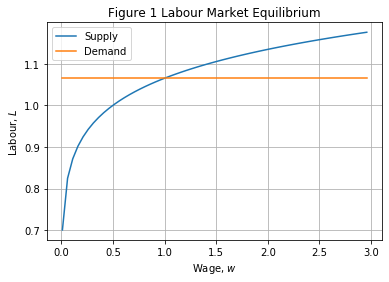

In [56]:
# a. Specify x's that the functions should be plotted for
xs = np.arange(0.01, 3, 0.05)

# b. Plot labour demand and supply using make_plot() from our module modelproject_function.py (imported as my)
my.make_plot(L_supply, xs=xs, alpha_val=0.9, phi_val=0.5, epsilon_val=0.1)
my.make_plot(L_demand, xs=xs, alpha_val=0.9, phi_val=0.5, epsilon_val=0.1)
plt.grid()
plt.xlabel("Wage, $w$")
plt.ylabel("Labour, $L$")
plt.legend(['Supply', 'Demand'])
plt.title("Figure 1 Labour Market Equilibrium")

# c. Calculate the equilibrium labour supply
supply_func = sm.lambdify((w, phi, epsilon), L_supply)
L_eq = supply_func(1, 0.5, 0.1)
print(f'The labour supply in equilibrium is: {L_eq:.3f}')

From Figure 1, it is clear that the labour demand does not depend on the real wage rate, $w$, since it's just a horisontal line. The labour supply, on the other hand, is increasing in the real wage rate. By inserting a real wage rate of 1 in the labour supply function as well as the parameter values below, we get the equilibrium amount of labour, which is 1.07. 

$$
\begin{align}
\phi = 0.5 \\
\epsilon = 0.1
\end{align}
$$

<br>

## Numerical solution

Since the labour demand/wage offer does not depend on the amount of labour already hired in the firm, it is pretty simple to find the equilibrium - just plug parameter values and $w = 1$ in the labour supply function, as we did above. So, there is no need for numerically optimising, but we're going to do it for the fun it anyways.

In [57]:
# a. Make sure parameters are defined as symbols and not values
w = sm.symbols('w')
phi = sm.symbols('phi')
alpha = sm.symbols('alpha')
epsilon = sm.symbols('epsilon')

# b. Make a python function of the utility and the budget constraint
u_func = sm.lambdify((C, L, phi, epsilon), u)

def budget_func(L, w):
    return w*L

In [58]:
# c. Set parameter values
epsilon = 0.1
phi = 0.5
w = 1
objective = lambda L: -u_func(budget_func(L, w), L, phi, epsilon)
L0 = 0.5

# d. Optimize
result = optimize.minimize_scalar(objective, method='Brent')
result

     fun: 0.027895710858186817
    nfev: 20
     nit: 16
 success: True
       x: 1.0650410869703453

Luckily, we got the same result as in the analytical solution: The worker will work 1.07 units of time to a real wage rate of 1 with the above specified parameter values.

<br>

# Introducing Decreasing Marginal Product of Labour

We now extend the model by changing the production function to be a bit more realistic by having decreasing returns to labour. The **production function** is then:

$$
Y = L^{(1-\alpha)}, \hspace{3ex} 0<\alpha<1
$$

<br>

## Analytical solution

Now, we do the same as before, just inserting the new production function. 


Define symbols:

In [59]:
L = sm.symbols('L')
C = sm.symbols('C')
w = sm.symbols('w')
Y = sm.symbols('Y')
u = sm.symbols('u')
epsilon = sm.symbols('epsilon')
v = sm.symbols('v')
pi = sm.symbols('pi')
phi = sm.symbols('phi')
lambd = sm.symbols('lambda')
alpha = sm.symbols('alpha')

<br>

### Problem of the consumer/worker

Everything is the same until inserting the market clearing condition:

In [60]:
Y = L**(1-alpha)
FOC_L3 = FOC_L2.subs(C, Y)
FOC_L3

Eq(L**(alpha - 1)*w - L**(1 + 1/epsilon)*phi/L, 0)

Solve for labour supply:

In [61]:
L_supply = sm.solve(FOC_L3, L)[0]
L_supply

(phi/w)**(epsilon/(epsilon*(alpha - 1) - 1))

This is the **labour supply function**. We see that it is very close to the expression we found in the other model with constant marginal product of labour. Note that the exponent is negative, so that's why $\phi$ and $w$ have swapped places. Now, the labour supply also depends positively on the input share of labour in the production process, hence it depends negatively on $\alpha$ (since $1-\alpha$ is the input share). 

<br>

### Problem of the firm

Define production function and profit:

In [62]:
pi = Y - w*L
pi

-L*w + L**(1 - alpha)

Find FOC of firm's problem with respect to labour:

In [63]:
pi_L = sm.diff(pi, L)
FOC_L = sm.Eq(pi_L, 0)
FOC_L

Eq(-w + L**(1 - alpha)*(1 - alpha)/L, 0)

Solve for the wage:

In [64]:
w_opt = sm.solve(FOC_L, w)[0]
w_opt

L**(-alpha)*(1 - alpha)

Now, the wage offer depends on the amount of labour already hired in the firm. This is due to the fact that we introduced decreasing marginal product of labour - the more labour hired in the firm, the less is one more unit of labour worth. Therefore, the wage offer is decreasing in the amount of labour already hired in the firm. 

Since the wage offer of the firm now depends on the amount of labour, it is more complicated to find the equilibrium than in the previous model. Analytically, it is done by inserting the labour supply function in the FOC of the firm's profit maximisation problem and solving for the labour. This is what we have done below. 

In [65]:
FOC2 = FOC_L.subs(L, L_supply)
FOC2

Eq(-w + (phi/w)**(-epsilon/(epsilon*(alpha - 1) - 1))*(1 - alpha)*((phi/w)**(epsilon/(epsilon*(alpha - 1) - 1)))**(1 - alpha), 0)

In [66]:
w_eq = sm.solve(FOC2, w)[0]
w_eq

(phi**(alpha*epsilon)*(1 - alpha)**(-alpha*epsilon + epsilon + 1))**(1/(epsilon + 1))

The real wage rate in equilibrium now depends on the parametrisation of the model. 

<br>

### Plot of Analytical Solution

The labour demand function is derived by isolating labour in the FOC of the firm's problem with respect to labour: 

In [67]:
L_demand = sm.solve(FOC_L, L)[0]
L_demand

((1 - alpha)/w)**(1/alpha)

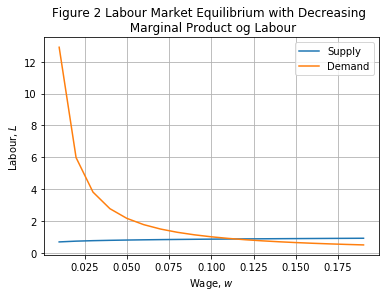

In [68]:
# a. Specify x's that the functions should be plotted for
xs = np.arange(0.01, 0.2, 0.01)

# b. Plot the labour supply and demand using make_plot() from our module modelproject_function.py (imported as my)
my.make_plot(L_supply, xs=xs, alpha_val=0.9, phi_val=0.5, epsilon_val=0.1)
my.make_plot(L_demand, xs=xs, alpha_val=0.9, phi_val=0.5, epsilon_val=0.1)
plt.grid()
plt.title("Figure 2 Labour Market Equilibrium with Decreasing \n Marginal Product og Labour")
plt.legend(['Supply', 'Demand'])
plt.xlabel("Wage, $w$")
plt.ylabel("Labour, $L$")
plt.show()

Figure 2 shows the market equilibrium using the same parametrisation as before, i.e. $\phi=0.5$ and $\epsilon=0.1$, and a input share of labour of 0.1, i.e. $\alpha=0.9$. The biggest change compared to the model with constant marginal product of labour is the labour demand function, which is not constant anymore, but decreasing in the wage. The amount labour in equilibrium seems to be around 1 as before, but the real wage rate is a lot lower now, around 0.11. 

<br>

### Numerical solution

The way to solve this model numerically is by trying different values of the real wage rate and see, if the demand for labour equals the labour supply. We do this by writing our own root finder. 

<br>


**Description of algorithm: Bisection**


We will code up a derivative-free algorithm of the method called bisection. The idea of bisection is to find the value at which a function is zero by following the steps:

1. Set two points, $a_0$ and $b_0$, between which you know that your function, $f(\cdot)$, has a root, and optimally only one root. 


2. Compute the function value at the midpoint between $a_0$ and $b_0$, i.e.

  $$
  f(m_0) = f\left(\frac{a_0 + b_0}{2}\right)
  $$
  
3. Reduce the interval in which the root lies by replacing either $a_0$ or $b_0$ with $m_0$:
   - If $f(a_0)f(m_0)<0$, the start of your interval should be $m_0$ in stead of $a_0$, because this means that the function has different signs at $m_0$ and $b_0$. Hence, the (or a) root of the function is between $m_0$ and $b_0$ (under the assumption that the function is continuous).
   
   - If $f(b_0)f(m_0)<0$, the end of your interval should be $m_0$ in stead of $b_0$, since the function has different signs at the two points, i.e. the root of the function is between $a_0$ and $m_0$. 
   
   
4. Repeat steps 2 and 3 until the value of the function in the midpoint is below some tolerance, $\varepsilon$. 

The labour supply and the labour demand equals in an equilibrium, so we want to use the root finder on the difference between the supply and demand:

$$
f(w) = L_{supply}(w) - L_{demand}(w)
$$

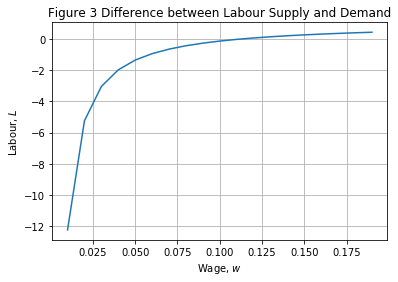

In [69]:
# a. Define function as difference between labour supply and demand
func = L_supply - L_demand

# b. Plot function using make_plot() from our module modelproject_function.py (imported as my)
my.make_plot(func, xs=xs, alpha_val=0.9, phi_val=0.5, epsilon_val=0.1)
plt.grid()
plt.xlabel("Wage, $w$")
plt.ylabel("Labour, $L$")
plt.title("Figure 3 Difference between Labour Supply and Demand")
plt.show()

Figure 3 shows the same as Figure 2 - the difference between labour supply and demand is around 0.11. 


Now, we find the root using our own root finder. 

In [70]:
# a. Make sure parameters are sympy symbols
epsilon = sm.symbols('epsilon')
phi = sm.symbols('phi')
alpha = sm.symbols('alpha')
w = sm.symbols('w')

# b. Make the difference between labour supply and demand a Python function 
func_ = sm.lambdify((w, alpha, phi, epsilon), func)
supply_func = sm.lambdify((w, alpha, phi, epsilon), L_supply) # Labour supply for later

alpha = 0.9
phi = 0.5
epsilon = 0.1

function = lambda w: func_(w, alpha, phi, epsilon)

# c. Find root using bisection() from our module modelproject_function.py (imported as my)
res = my.bisection(function, a=0.01, b=0.2, tol=1e-10)

print(f'Bisection solution: \n The difference between labour supply and demand has the value {res[1]}'
      f'\n at the wage {res[0]:.3f} after {res[2]} iterations')

# d. Find the corresponding labour 
L_eq = supply_func(res[0], alpha, phi, epsilon)
print(f'The amount of labour in equilibrium is: {L_eq:.3f}')

Bisection solution: 
 The difference between labour supply and demand has the value -1.5510481787828212e-11
 at the wage 0.114 after 28 iterations
The amount of labour in equilibrium is: 0.864


The result of the numerical optimisation is an equilibrium real wage rate of 0.114, which we also saw from Figure 2 and 3. The corresponding amount of labour is 0.864, hence it is lower than in the model with constant marginal product of labour. This is intuitive, since the firm now get less from one input of labour, it is not willing to pay as much in wage to the worker. Since the real wage rate is now a lot lower, the worker is not willing to work as much, but the labour supply actually doesn't fall that much compared to the other model. 

<br>

## Results across Parametrisations

We will now further analyse the model with decreasing marginal product of labour by varying the parameters of the model and examine how this changes the equilibrium of the model. We will find the numerical solution to the model using our `bisection()` function, which is in our module `modelproject_functions.py`. 


After going through how the different parameters affect the equilibrium, we have made an interactive figure, so you can change the parametrisation yourself and explore the model. 

### Changing the Input Share of Labour, $1-\alpha$

Below, we vary the input share of labour, $1-\alpha$, from 0 to 1, and calculate the real wage rate in equilibrium. 

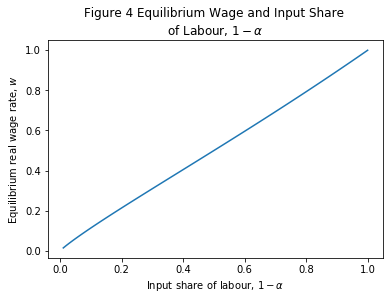

In [83]:
# a. Define values to loop over
alph = np.arange(0, 1, 0.01)

# b. Specify other parameter values
epsilon = 0.1
phi = 0.5

# c. Find equilibrium wage for different alphas in loop using bisection() from modelproject_function.py (imported as my)
w_eq = []
for a in alph:
    function = lambda w: func_(w, a, phi, epsilon)
    res = my.bisection(function,  a=0.0001, b=100, tol=1e-10)
    w_eq.append(res[0])

# d. Plot the equilibrium wage as a function of epsilon   
input_share = [1 - a for a in alph]
plt.plot(input_share, w_eq)
plt.xlabel(r"Input share of labour, $1 - \alpha$")
plt.ylabel("Equilibrium real wage rate, $w$")
plt.title("Figure 4 Equilibrium Wage and Input Share \n" r"of Labour, $1 - \alpha$");

From Figure 4 above, wee see that the higher the input share of labour, the higher is the real wage rate in equilibrium. The input share, $1-\alpha$, captures the degree to which the marginal product of labour is increasing, i.e. how important labour is in the production process. We see that the more important labour is, the more the firm is willing to pay for it. 

### Changing the Scale of Disutility of Labour, $\phi$

Below, we vary the scale of the disutility of labour, $\phi$, from 0.1 to 10, and calculate the real wage rate and the supply of labour in equilibrium. 

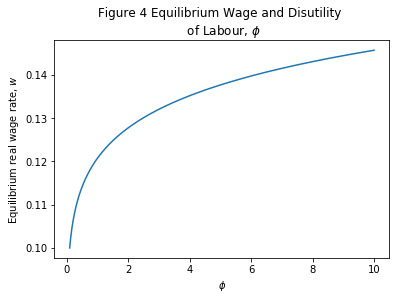

In [73]:
# a. Define values to loop over
ph = np.arange(0.1, 10, 0.01)

# b. Specify other parameter values
epsilon = 0.1
alpha = 0.9

# c. Find equilibrium wage for different phis in loop using bisection() from modelproject_function.py (imported as my)
w_eq = []
for p in ph:
    function = lambda w: func_(w, alpha, p, epsilon)
    res = my.bisection(function, a=0.0001, b=100, tol=1e-10)
    w_eq.append(res[0])

# d. Plot the equilibrium wage as a function of epsilon 
plt.plot(ph, w_eq)
plt.xlabel("$\phi$")
plt.ylabel("Equilibrium real wage rate, $w$")
plt.title("Figure 5 Equilibrium Wage and Disutility \n of Labour, $\phi$");

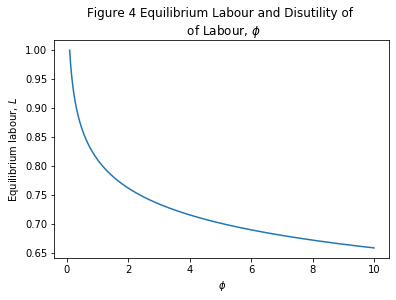

In [101]:
# a. Define values to loop over
ph = np.arange(0.1, 10, 0.01)

# b. Specify other parameter values
epsilon = 0.1
alpha = 0.9

# c. Find equilibrium labour for different phis in loop using bisection() from modelproject_function.py (imported as my)
L_eq = []
for p in ph:
    function = lambda w: func_(w, alpha, p, epsilon)
    res = my.bisection(function,  a=0.01, b=10, tol=1e-10)
    L_eq.append(supply_func(res[0], alpha, p, epsilon))

# d. Plot the equilibrium wage as a function of epsilon    
plt.plot(ph, L_eq)
plt.xlabel("$\phi$")
plt.ylabel("Equilibrium labour, $L$")
plt.title("Figure 6 Equilibrium Labour and Disutility of \n of Labour, $\phi$");

Here, we see that the higher the disutility of labour, the less does the individual work in equilibrium, even though the real wage rate increases in the disutility of labour. 

### Interactive Figure

Run the code block below to be able to change $\alpha$ and $\phi$ and see how it changes the equlibrium of the model. 

In [117]:
# a. Defining figures to be functions of alpha and phi
def interactive_func(alpha, phi):
    
    # i. Plot the labour supply and demand using make_plot() from modelproject_function.py (imported as my)
    my.make_plot(L_supply, xs=np.arange(0.01, 1, 0.01), alpha_val=alpha, phi_val=phi, epsilon_val=0.1)
    my.make_plot(L_demand, xs=np.arange(0.01, 1, 0.01), alpha_val=alpha, phi_val=phi, epsilon_val=0.1)
    plt.title('Figure 7 Labour Market equlibrium')
    plt.grid()
    plt.xlabel('Real wage rate, $w$')
    plt.ylabel('Labout supply, $L$')
    
    # ii. Find equilibrium using bisection() from modelproject_function.py (imported as my)
    function = lambda w: func_(w, alpha, phi, epsilon=0.1)
    
    res = my.bisection(function, a=0.0001, b=100)
    
    if type(res) is not tuple:
        print(f'No equilibrium with this parametrisation')
    
    elif type(res) is tuple:
        eq_w = res[0]
        eq_L = supply_func(res[0], alpha, phi, epsilon=0.1)
    
        # iii. Print the equilibirum wage and labour
        print(f'Equilibrium real wage rate: {eq_w:.3f}')
        print(f'Equilibrium labour supply: {eq_L:.3f}') 
    
# b. Create interactive plot
widgets.interact(interactive_func,
    alpha=widgets.FloatSlider(description=r"$\alpha$", min=0, max=1, step=0.001, value=0.9),
    phi=widgets.FloatSlider(description="$\phi$", min=0.01, max=10, step=0.05, value=2),
);

interactive(children=(FloatSlider(value=0.9, description='$\\alpha$', max=1.0, step=0.001), FloatSlider(value=…

## Conclusion

In this project, we have looked at two versions of a simple model for the labour market. In both models, it was no problem to find the equilibrium analytically using `sympy`. In the first model with constant marginal product of labour, we found that the model was very easily solved, as the representative firm always would offer the same wage to the worker - one equal to the price. In the other model with decreasing marginal product of labour, finding the equilibrium was less simple, but still not too complicated. We solved the models numerically anyways and found the same as in the analytical solution. 


We coded an algorithm to find the equilibrium, a so-called root finder. Our algorithm used the bisection method, that Jeppe presented in lecture 10, which is a derivative-free method. We found the algorithm very effective and intuitive, when you get to write the code yourself. 


All in all, we have learned different methods to solve a model in Python, which we might one day use on a model, that cannot be solved by hand. 